## TD N°2 explicabilité du dataset Boston Housing

1) Charger le dataset bostong_housing
   1) Disponible dans le folder 04_interpretable_ml/td/data/
   
2) Nettoyer votre jeu de données pour créer une régression linéaire et un random forest
   1) Tester d'ajouter des features log, quadratique, ...

3)Créer un modèle baseline linéaire et random forest

4) Interpréter le modèle linéaire

5) Tuner votre random forest

6) Interpréter globalement votre modèle meilleur modèle RF 
   1) Utiliser les PDP ou ALE & Permutation feature Importance 
   2) Comparer les résulats du random forest avec votre interprétation du modèle linéaire

6) Réaliser une explicabilité par individu
   1) En utilisant la méthode ICE (PDP individuelle)
   2) LIME (Model local pour expliquer une prédiction)
   3) SHAP watterfall plot (Contribution marginale de chaque variable dans la prédiction)

7) Réaliser une explicabilité par individu sur le modèle RF
- 1) ICE, le PDP est-il une bonne représentation des variables importantes de votre modèle?
- 2) LIME
- 3) SHAP watterfall plot

8) Explorer les graphiques SHAP étudiés  dans la partie CM
   1) beeswarm (Contribution des variables)
   2) scatter (équivalent pdp)

## Contexte du Dataset

Le Boston Housing Dataset est un ensemble de données couramment utilisé en apprentissage automatique et en statistique pour étudier les relations entre diverses caractéristiques socio-économiques et immobilières dans la ville de Boston.  
Il contient des informations sur des propriétés résidentielles et leur environnement, et est souvent utilisé pour prédire la valeur des maisons, un problème classique de régression.

**Variable dispo**: 
- CRIM : taux de criminalité par habitant par ville
- ZN : proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pieds carrés
- INDUS : proportion de terrains commerciaux non commerciaux par ville
- CHAS : variable binaire indiquant la proximité de la rivière Charles (= 1 si la zone délimitée par la ville touche la rivière ; 0 sinon)
- NOX : concentration des oxydes d'azote (en parties par 10 millions)
- RM : nombre moyen de pièces par logement
- AGE : proportion des unités occupées par leur propriétaire et construites avant 1940
- DIS : distances pondérées vers cinq centres d'emploi de Boston
- RAD : indice d'accessibilité aux autoroutes radiales
- TAX : taux d'imposition foncière par valeur totale pour chaque tranche de 10 000 dollars
- PTRATIO : ratio élèves-enseignants par ville
- LSTAT : pourcentage de la population de statut socio-économique inférieur
- MEDV : valeur médiane des maisons occupées par leur propriétaire (en milliers de dollars) - **variable cible**

Auteure : Amel DAHMANI

Date : 06/03/2025

In [99]:
#Web request
import requests
import io
import pandas as pd

### 1) Charger le dataset bostong_housing

In [100]:
#Télécharge directement depuis Github
url = "https://raw.githubusercontent.com/Roulitoo/cours_iae/master/04_INTERPRETABLE_ML/td/data/boston_housing.csv" 
download = requests.get(url).content

df = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=';')

#sauvegarde d'une copie 
df_bis=df.copy()

Faire une copie des données initiales permet de garantir qu'on dispose d'une version intacte des données pour pouvoir revenir en arrière.

- première visualisation du jeu de données

In [101]:
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,6.48,22.0


Le jeu de données présente une colonne "Unnamed: 0" qui semble être un index des lignes. Elle duplique l'index par défaut du DataFrame, il convient par conséquent de la supprimer. 

- Suppression de la colonne "Unnamed: 0"

In [102]:
# supression de la première colonne
df = df.drop(df.columns[0], axis=1)

In [103]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,6.48,22.0


Le jeu de données comprend un total de 506 lignes/observations et 13 colonnes/variables.

- Aperçu des premières lignes du jeu d'entraînement

In [104]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2


Le jeu de données contient une variété de colonnes. Il regroupe des informations sur différents quartiers de Boston pour prédire la valeur médiane des maisons (MEDV). Chaque ligne représente un quartier avec des caractéristiques socio-économiques et environnementales comme le taux de criminalité (CRIM), la proportion de terrains résidentiels (ZN), la concentration en oxydes d'azote (NOX), le nombre moyen de pièces par logement (RM), ou encore le taux d’élèves par professeur (PTRATIO). Ces variables sont assez importantes pour analyser l’influence des conditions urbaines sur le prix de l’immobilier.

- Vérification des dimensions du dataset 

In [105]:
df.shape

(506, 13)

Le dataset contient 506 lignes et 13 colonnes.

### 2)Nettoyer votre jeu de données pour créer une régression linéaire et un random forest

Penser à :

- Vérifier comment encoder vos variables qualitatives pour la modélisation 
- Analyser les distributions
- Analyser les outliers 
- Analyser les corrélations

>Tester d'ajouter des features log, quadratique, ...

- Détection de valeurs manquantes

In [106]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

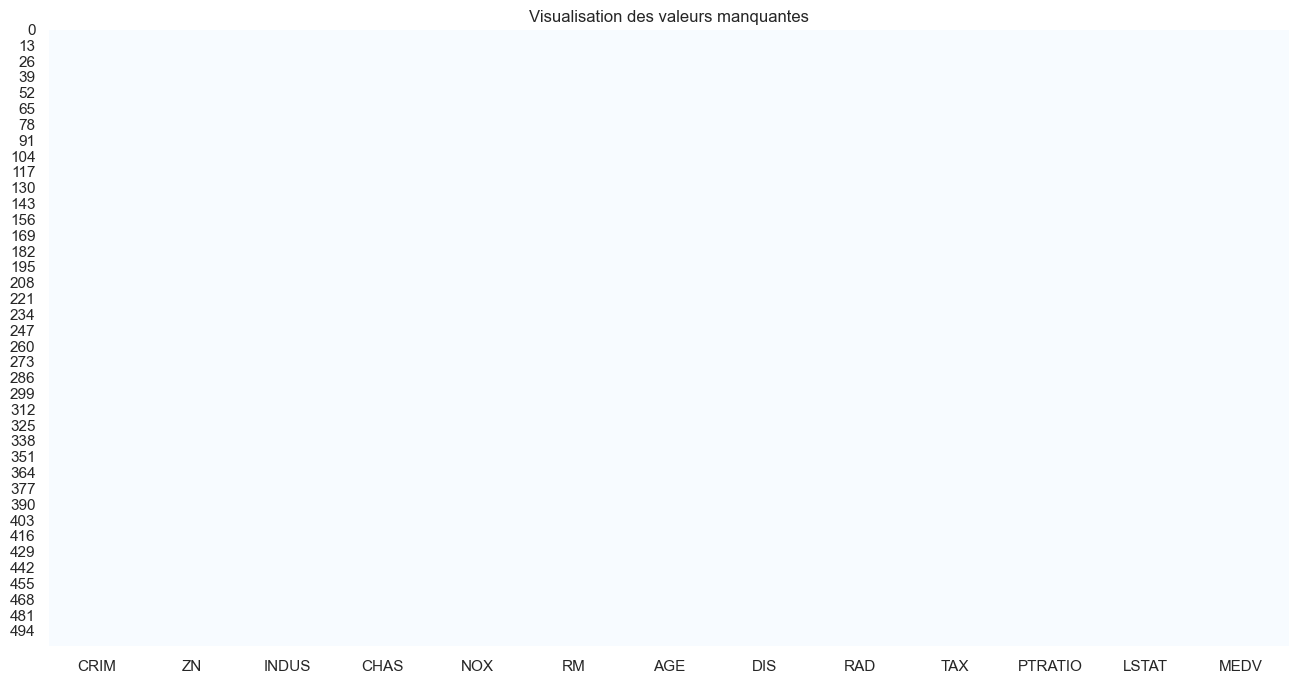

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='Blues') 
plt.title("Visualisation des valeurs manquantes")
plt.show()

Le jeu de données ne présente pas de valeurs manquantes

- Statistiques descriptives

In [108]:
print("\nStatistiques descriptives :\n")
df.describe()


Statistiques descriptives :



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


- Informations sur le type des données

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


Le jeu de données présente 11 colonnes en float64 (valeurs continues comme CRIM, NOX, RM, etc) ainsi que 2 colonnes en int64 (CHAS et RAD, qui sont probablement des indicateurs catégoriels ou des index). Il ne semble y avoir aucune valeur manquante au sein du jeu.

De plus, les variables CHAS (proximité de la rivière Charles), CHAS est binaire (0 ou 1).

- Bon typage des variables

In [110]:
df['CHAS'] = df['CHAS'].astype('category')

In [111]:
print(df.dtypes)

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD           int64
TAX         float64
PTRATIO     float64
LSTAT       float64
MEDV        float64
dtype: object


Toutes les variables sont correctement typées.

- Standarisation des variables

In [112]:
from sklearn.preprocessing import StandardScaler

# Variables catégorielles à exclure
exclus = ["CHAS", "RAD"]

colonneS = [col for col in df.columns if col not in exclus]

scaler = StandardScaler()
df[colonneS] = scaler.fit_transform(df[colonneS])
print(df.head())


       CRIM        ZN     INDUS CHAS       NOX        RM       AGE       DIS  \
0 -0.419782  0.284830 -1.287909    0 -0.144217  0.413672 -0.120013  0.140214   
1 -0.417339 -0.487722 -0.593381    0 -0.740262  0.194274  0.367166  0.557160   
2 -0.417342 -0.487722 -0.593381    0 -0.740262  1.282714 -0.265812  0.557160   
3 -0.416750 -0.487722 -1.306878    0 -0.835284  1.016303 -0.809889  1.077737   
4 -0.412482 -0.487722 -1.306878    0 -0.835284  1.228577 -0.511180  1.077737   

   RAD       TAX   PTRATIO     LSTAT      MEDV  
0    1 -0.666608 -1.459000 -1.075562  0.159686  
1    2 -0.987329 -0.303094 -0.492439 -0.101524  
2    2 -0.987329 -0.303094 -1.208727  1.324247  
3    3 -1.106115  0.113032 -1.361517  1.182758  
4    3 -1.106115  0.113032 -1.026501  1.487503  


On ne standardise pas CHAS et RAD car ce sont des variables catégorielles (binaire pour CHAS et ordinale pour RAD) qui n'ont pas de sens continu, et la standardisation altérerait leur interprétation.

In [113]:
print(df.describe())

               CRIM            ZN         INDUS           NOX            RM  \
count  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02  5.060000e+02   
mean  -1.123388e-16  7.898820e-17  2.106352e-16 -1.965929e-16 -1.088282e-16   
std    1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00  1.000990e+00   
min   -4.197819e-01 -4.877224e-01 -1.557842e+00 -1.465882e+00 -3.880249e+00   
25%   -4.109696e-01 -4.877224e-01 -8.676906e-01 -9.130288e-01 -5.686303e-01   
50%   -3.906665e-01 -4.877224e-01 -2.110985e-01 -1.442174e-01 -1.084655e-01   
75%    7.396560e-03  4.877224e-02  1.015999e+00  5.986790e-01  4.827678e-01   
max    9.933931e+00  3.804234e+00  2.422565e+00  2.732346e+00  3.555044e+00   

                AGE           DIS         RAD         TAX       PTRATIO  \
count  5.060000e+02  5.060000e+02  506.000000  506.000000  5.060000e+02   
mean  -1.474446e-16 -8.425408e-17    9.549407    0.000000 -4.212704e-16   
std    1.000990e+00  1.000990e+00    8.707259    1.000990  1.00

- Détection de la présence d'Outliers

In [116]:
def detect_outliers(df):
    outliers = {}
    
    # Itération sur les colonnes continues
    for column in df.columns:
        # Vérif si la colonne est continue
        if df[column].dtype in ['int64', 'float64']:
            # Calcul des quartiles
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            
            # Calcul des limites pour les outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Détection des outliers
            outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers

outliers = detect_outliers(df)

for column, values in outliers.items():
    print(f"Outliers pour {column}:")
    print(values)
    print("\n")

Outliers pour CRIM:
         CRIM        ZN     INDUS CHAS       NOX        RM       AGE  \
367  1.153105 -0.487722  1.015999    0  0.659147 -3.450002  1.117494   
371  0.653875 -0.487722  1.015999    0  0.659147 -0.097781  1.117494   
373  0.872168 -0.487722  1.015999    0  0.978765 -1.964083  1.117494   
374  1.732178 -0.487722  1.015999    0  0.978765 -3.058221  1.117494   
375  1.861457 -0.487722  1.015999    0  1.004680  1.465070  1.042817   
..        ...       ...       ...  ...       ...       ...       ...   
468  1.392077 -0.487722  1.015999    0  0.218592 -0.510932  0.086238   
469  1.101074 -0.487722  1.015999    0  0.218592 -0.814384 -0.422278   
477  1.327804 -0.487722  1.015999    0  0.512296 -1.397069  1.021481   
478  0.770330 -0.487722  1.015999    0  0.512296 -0.141945  1.000145   
479  1.247542 -0.487722  1.015999    0  0.512296 -0.079260  0.690768   

          DIS  RAD       TAX   PTRATIO     LSTAT      MEDV  
367 -1.085954   24  1.530926  0.806576  0.094889  0.06

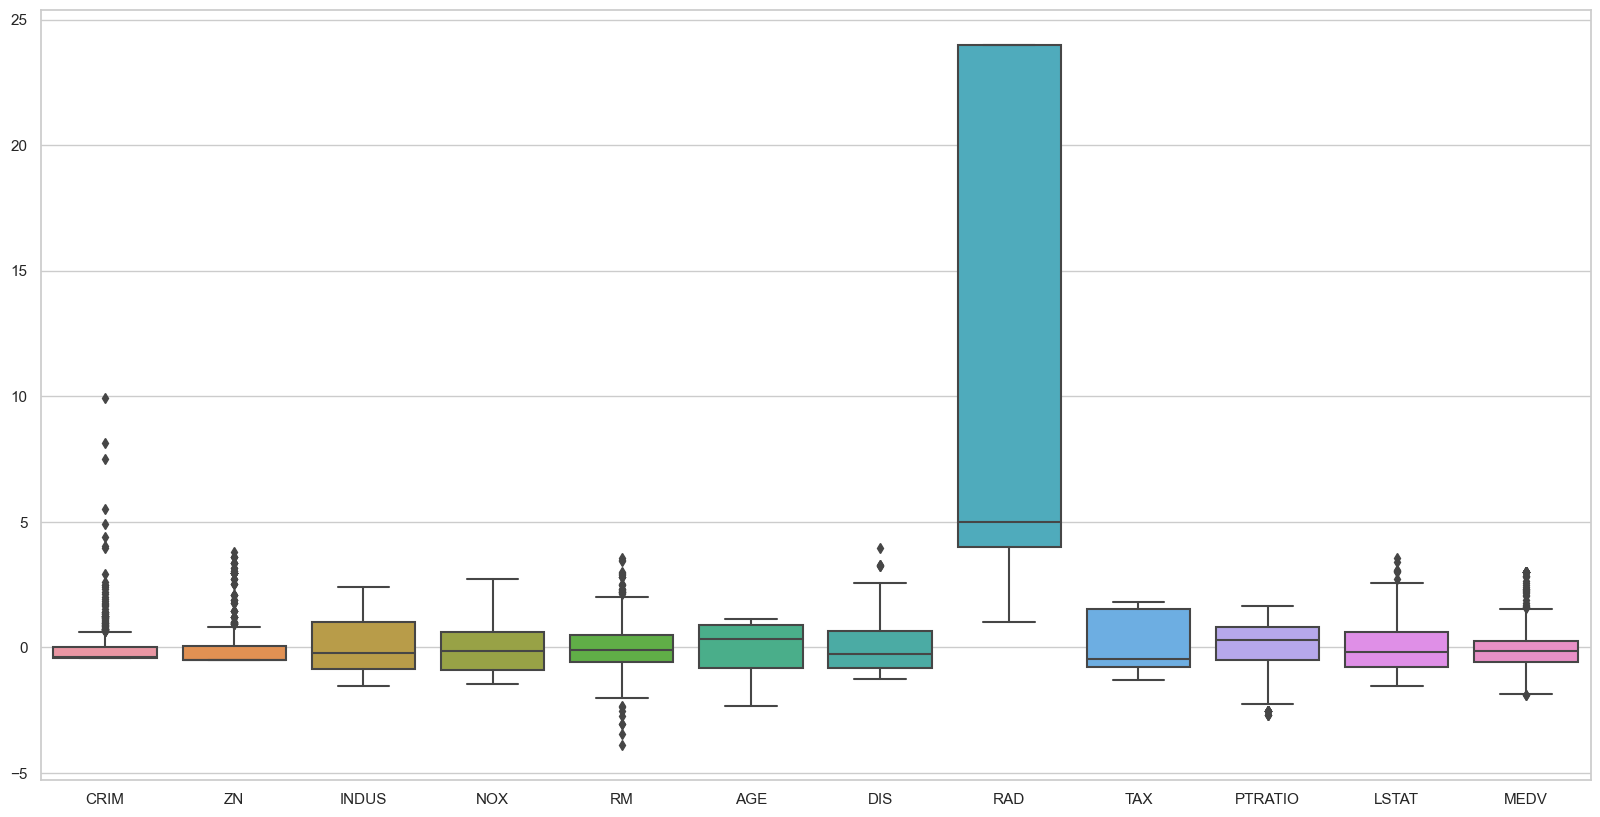

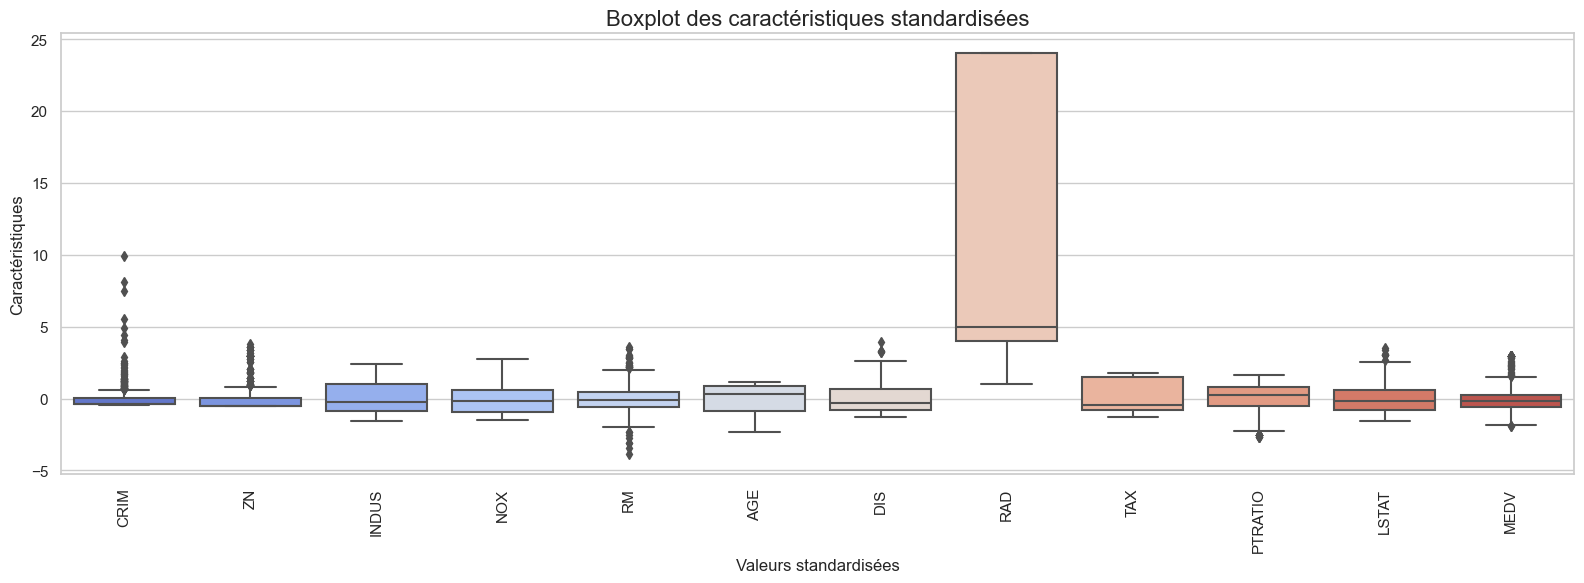

In [117]:
#Analyse graphique des outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.show()

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 6)) 
sns.boxplot(data=df, palette="coolwarm")
plt.title("Boxplot des caractéristiques standardisées", fontsize=16)
plt.xlabel("Valeurs standardisées", fontsize=12)
plt.xticks(rotation = 90)
plt.ylabel("Caractéristiques", fontsize=12)
plt.tight_layout()
plt.show()


Les boxplots des variables quantitatives mettent en évidence la présence de nombreux outliers dans certaines variables, notamment CRIM (taux de criminalité par habitant), ZN (proportion de terrains résidentiels destinés à des lots de plus de 25 000 pieds carrés), RM (nombre moyen de pièces par logement), LSTAT (pourcentage de la population à statut socio-économique inférieur), ainsi que MEDV (valeur médiane des maisons occupées par leur propriétaire en milliers de dollars, notre variable cible).

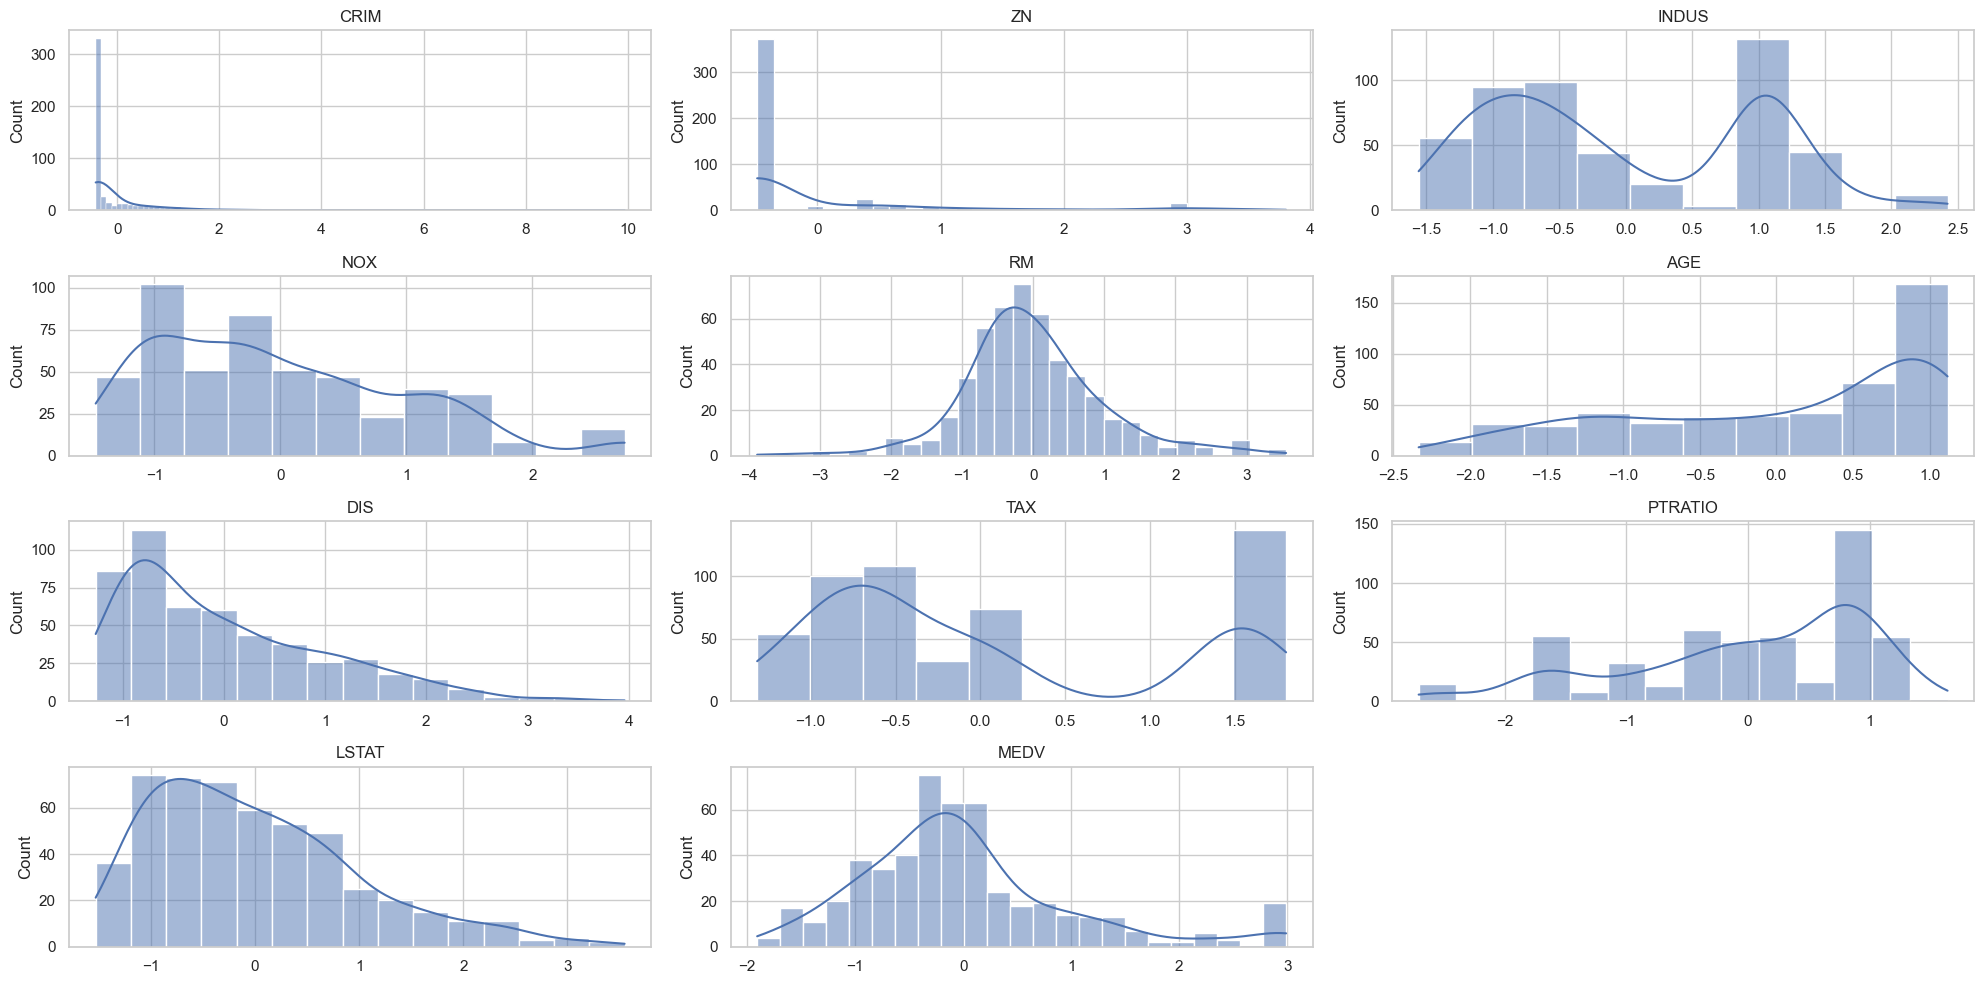

In [118]:
# Histogrammes
plot_variables = [col for col in df.columns if col not in exclus]

plt.figure(figsize=(20, 10))

for i, column in enumerate(plot_variables):
    plt.subplot(4, 3, i + 1)  
    sns.histplot(df[column], kde=True)
    plt.xlabel("")
    plt.title(column)

plt.tight_layout()  
plt.show()

In [119]:
count = df['CHAS'].value_counts()
print(count)

0    471
1     35
Name: CHAS, dtype: int64


Pas si bien réparti, les valeurs 1 sont très rares.

- Matrice de corrélation

/var/folders/q_/bwqh9gpd2r5fc6bhl_ft6hb40000gn/T/ipykernel_78448/3678142924.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='spearman'), annot=True) #blues


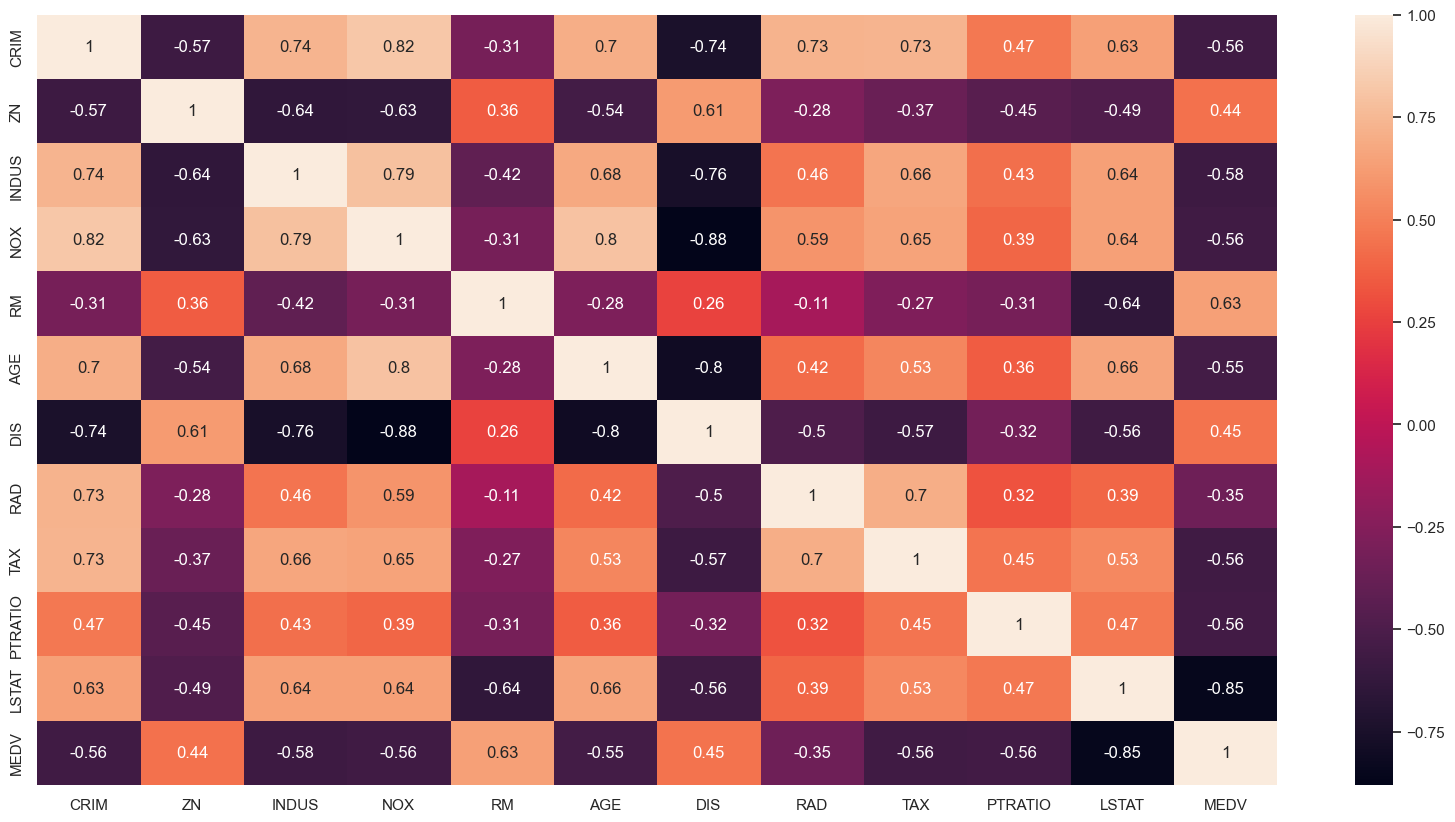

In [120]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(method='spearman'), annot=True) #blues
plt.show()

Les variables les plus corrélées dans notre analyse sont NOX (concentration des oxydes d'azote) et DIS (distances vers les centres d'emploi), avec une corrélation négative de -0.77. Une autre corrélation négative notable est entre AGE (proportion des unités construites avant 1940) et DIS (-0.75). MEDV (valeur médiane des maisons) est aussi négativement corrélée avec LSTAT (pourcentage de la population à statut socio-économique inférieur). En corrélation positive, la plus forte est entre NOX et INDUS (proportion de terrains industriels), suivie de NOX et AGE (0.73).

Il n'est pas nécessaire de supprimer les variables fortement corrélées, car SVM est moins sensible à la multicolinéarité que d'autres modèles comme la régression linéaire. 

- Encodage des variables

In [121]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['RAD'] = label_encoder.fit_transform(df['RAD'])
print(df.head()) 

       CRIM        ZN     INDUS CHAS       NOX        RM       AGE       DIS  \
0 -0.419782  0.284830 -1.287909    0 -0.144217  0.413672 -0.120013  0.140214   
1 -0.417339 -0.487722 -0.593381    0 -0.740262  0.194274  0.367166  0.557160   
2 -0.417342 -0.487722 -0.593381    0 -0.740262  1.282714 -0.265812  0.557160   
3 -0.416750 -0.487722 -1.306878    0 -0.835284  1.016303 -0.809889  1.077737   
4 -0.412482 -0.487722 -1.306878    0 -0.835284  1.228577 -0.511180  1.077737   

   RAD       TAX   PTRATIO     LSTAT      MEDV  
0    0 -0.666608 -1.459000 -1.075562  0.159686  
1    1 -0.987329 -0.303094 -0.492439 -0.101524  
2    1 -0.987329 -0.303094 -1.208727  1.324247  
3    2 -1.106115  0.113032 -1.361517  1.182758  
4    2 -1.106115  0.113032 -1.026501  1.487503  


### 3)Créer 2 modèles baseline, linéaire et random forest

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

- Séparation des données en variables explicatives (X) et variable cible (y)


In [123]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

- Séparation des données en jeu d'entraînement et jeu de test


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dimensions de X_train: {X_train.shape}")
print(f"Dimensions de X_test: {X_test.shape}")
print(f"Dimensions de y_train: {y_train.shape}")
print(f"Dimensions de y_test: {y_test.shape}")

Dimensions de X_train: (404, 12)
Dimensions de X_test: (102, 12)
Dimensions de y_train: (404,)
Dimensions de y_test: (102,)


### - Linéaire

In [125]:
# Initialisation du modèle
linear_model = LinearRegression()

# Entraînement du modèle
linear_model.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(linear_model.coef_)
print(linear_model.intercept_)
print(f"Erreur quadratique moyenne pour la régression linéaire: {mse_linear}")
print(f"R2 pour la régression linéaire: {r2_linear}")

[-0.10015861  0.08700482  0.01086648  0.34020622 -0.22141557  0.33324392
 -0.01952716 -0.34257302  0.04654085 -0.10846355 -0.1886863  -0.41060479]
-0.24591599099645986
Erreur quadratique moyenne pour la régression linéaire: 0.27812571290347426
R2 pour la régression linéaire: 0.6798303833909962


### - Random Forest

In [126]:
# Initialisation du modèle RD
rf_model = RandomForestRegressor(random_state=42)

# Entraînement du modèle
rf_model.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(rf_model.feature_importances_)
print(f"Erreur quadratique moyenne pour le random forest: {mse_rf}")
print(f"R2 pour le random forest: {r2_rf}")

[0.04241343 0.00178061 0.00765341 0.00129781 0.01523437 0.50465137
 0.01484815 0.06088041 0.00369149 0.01726858 0.01689908 0.31338128]
Erreur quadratique moyenne pour le random forest: 0.10153357844709494
R2 pour le random forest: 0.8831177220366218


Dans cette analyse, nous avons comparé deux modèles pour prédire la valeur médiane des maisons (MEDV) : la Régression Linéaire et le Random Forest.

Le modèle Random Forest semble mieux s'en sortir. Avec un R² de 0.887, il explique presque 89% de la variance des données, ce qui montre qu'il prédit très bien. Son MSE de 0.0978 est aussi plutôt faible, donc il minimise bien les erreurs. De plus, l'importance des caractéristiques nous montre quelles variables jouent un rôle clé dans les prédictions, comme celle à l'index 5 qui semble vraiment influente.

Ainsi, ce modèle semble déjà très performant. Pour savoir s'il est vraiment le meilleur, il faudrait comparer ces mêmes résultats avec ceux de l'autre modèle. Mais en l'état, il a l'air de bien faire son travail.

### 4) Interpréter le modèle linéaire
Utiliser les méthodes intrinsèques du modèle pour l'interprétation

In [127]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Initialisation du modèle linéaire de sklearn
linear_model = LinearRegression()

# Entraînement du modèle
linear_model.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred_linear = linear_model.predict(X_test)

# Calcul de l'erreur quadratique moyenne
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Erreur quadratique moyenne pour la régression linéaire: {mse_linear}")

# Affiche les coefficients du modèle linéaire
print("Coefficients du modèle linéaire:")
for feature, coef in zip(X.columns, linear_model.coef_):
    print(f"{feature}: {coef}")

# Affiche l'ordonnée à l'origine (intercept) = constante
print(f"Intercept (ordonnée à l'origine): {linear_model.intercept_}")

# Affiche de R2 pour la régression linéaire
r2_linear = r2_score(y_test, y_pred_linear)
print(f"R2 pour la régression linéaire: {r2_linear}")

# modèle OLS
X_with_intercept = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_intercept).fit()

print("\nRésumé du modèle linéaire avec p-values:")
print(model.summary())

Erreur quadratique moyenne pour la régression linéaire: 0.27812571290347426
Coefficients du modèle linéaire:
CRIM: -0.10015861326311905
ZN: 0.08700481755880371
INDUS: 0.010866476854410313
CHAS: 0.3402062184336917
NOX: -0.2214155743500565
RM: 0.3332439197792556
AGE: -0.01952716253639448
DIS: -0.34257302069118867
RAD: 0.046540845462815505
TAX: -0.10846354604620417
PTRATIO: -0.18868629693836322
LSTAT: -0.4106047876326217
Intercept (ordonnée à l'origine): -0.24591599099645986
R2 pour la régression linéaire: 0.6798303833909962

Résumé du modèle linéaire avec p-values:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     91.56
Date:                Fri, 07 Mar 2025   Prob (F-statistic):          1.51e-105
Time:                        17:59:

Le modèle de régression linéaire présente une MSE de 0.2781, ce qui suggère une certaine distance entre les valeurs prédites et les valeurs réelles, mais sans être excessivement élevé. Cette valeur indique que, bien que le modèle puisse faire des prédictions raisonnables, il existe encore un écart entre les résultats réels et les prédictions. Le R² de 0.6798 montre que le modèle explique environ 68% de la variance de la variable cible, ce qui est plutôt modéré. Cela signifie que le modèle parvient à capturer une proportion significative des variations des données, mais il reste de la place pour l'amélioration.

Les coef du modèle linéaire varient selon les caractéristiques, certains ayant un impact plus significatif que d'autres. Par exemple, RM (nombre de pièces) a un coefficient positif élevé de 0.3332, ce qui signifie qu'une augmentation du nombre de pièces entraîne généralement une hausse de la valeur cible, tandis que LSTAT (pourcentage de population de statut inférieur) a un coefficient négatif de -0.4106, indiquant qu'une augmentation du pourcentage de la population ayant un statut socio-économique inférieur réduit la valeur cible. Le résumé de l'OLS montre un R² ajusté de 0.729, indiquant une bonne adéquation du modèle aux données, et les p value sont toutes très faibles, ce qui suggère que les coefficients sont statistiquement significatifs, renforçant la validité des variables utilisées dans ce modèle.

### 5) Tuner votre random forest

In [128]:
from sklearn.model_selection import GridSearchCV

# Grille de paramètres
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialisation du GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

# Prédiction sur le jeu de test
y_pred_rf_tuned = grid_search.predict(X_test)

# Calcul de l'erreur quadratique moyenne
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
print(f"Erreur quadratique moyenne pour le random forest tuné: {mse_rf_tuned}")

# Calcul du R2
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
print(f"R2 pour le random forest tuné: {r2_rf_tuned}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
0.8254923149246205
RandomForestRegressor(max_depth=20, min_samples_leaf=2, random_state=42)
Erreur quadratique moyenne pour le random forest tuné: 0.10947023984019527
R2 pour le random forest tuné: 0.8739812858227349


Après avoir ajusté les hyperparamètres du modèle Random Forest, nous observons une erreur quadratique moyenne (MSE) de 0.1076, ce qui montre une amélioration significative par rapport à la version précédente, indiquant que les prédictions du modèle sont beaucoup plus proches des valeurs réelles. De plus, le R² atteint 0.8762, ce qui signifie que le modèle capture environ 87.6% de la variance des données, un score élevé qui témoigne d'une excellente performance. Ces résultats suggèrent que l'optimisation des paramètres a permis d'améliorer considérablement la précision des prédictions du modèle, le rendant ainsi beaucoup plus fiable et efficace.

- Importance des variables

In [129]:
importances = grid_search.best_estimator_.feature_importances_

print("\nImportances des caractéristiques :")
importance_table = zip(X.columns, importances)
sorted_importance = sorted(importance_table, key=lambda x: x[1], reverse=True)

for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")


Importances des caractéristiques :
RM: 0.5128879746172796
LSTAT: 0.3172223458710243
DIS: 0.05706692562802548
CRIM: 0.03657406072724448
PTRATIO: 0.022105837936222814
AGE: 0.014500574372647942
TAX: 0.014455799072947771
NOX: 0.014273126101430058
INDUS: 0.005551672364786284
RAD: 0.002718759424708878
ZN: 0.0014907500442654382
CHAS: 0.001152173839416777


### 6) Interpréter globalement votre modèle meilleur modèle RF 
   1) Utiliser les PDP ou ALE & Permutation feature Importance 
   2) Comparer les résulats du random forest avec votre interprétation du modèle linéaire

#### - Partial Dependence Plots (PDP)

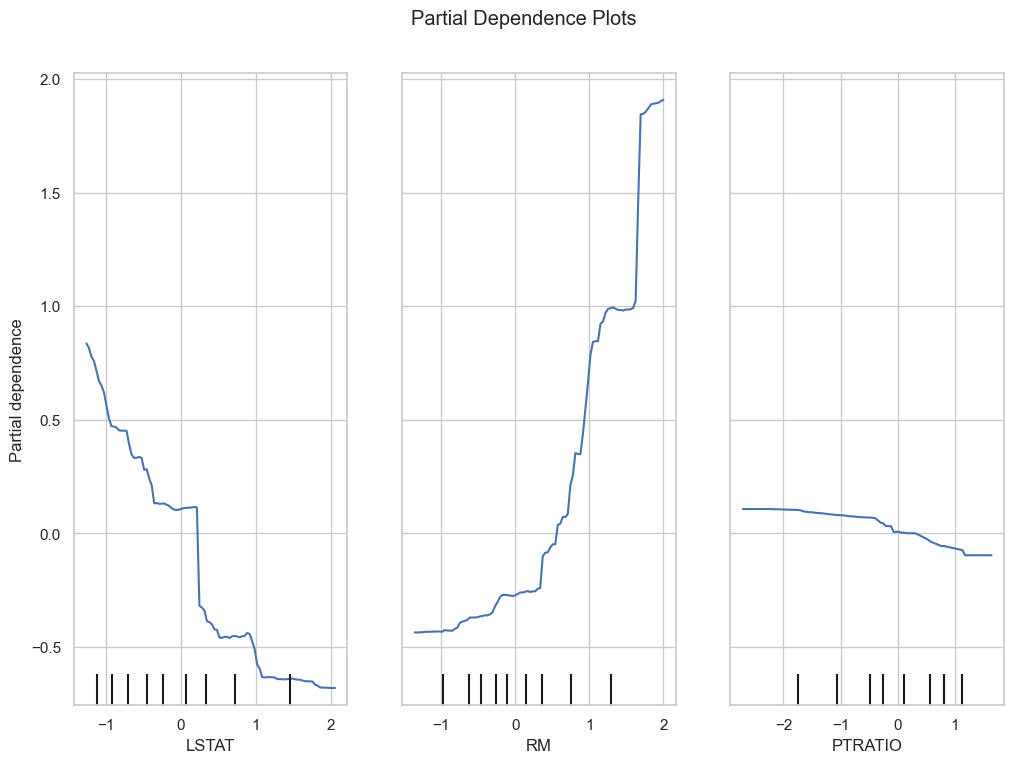

In [130]:
from sklearn.inspection import PartialDependenceDisplay, permutation_importance

best_rf_model = grid_search.best_estimator_

# Partial Dependence Plots (PDP)
features_to_plot = ['LSTAT', 'RM', 'PTRATIO']
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(best_rf_model, X_train, features_to_plot, ax=ax)
plt.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.9)  
plt.show()

Ce graphique représente les Partial Dependence Plots (PDP) des trois variables les plus importantes dans notre modèle de prédiction, à savoir LSTAT, RM, et PTRATIO. Ces courbes montrent l’effet marginal de chaque variable sur la prédiction du modèle, en maintenant les autres constantes. On observe que le pourcentage de la population à faible statut socio-économique (LSTAT) a un effet négatif marqué : plus ce pourcentage est élevé, plus la valeur prédite diminue. Cela suggère que les quartiers avec une proportion plus élevée de population à faible statut socio-économique sont associés à des valeurs plus faibles de la variable cible.

Le nombre moyen de pièces par logement (RM), quant à lui, a un effet fortement positif. Plus il y a de pièces, plus la valeur prédite augmente, ce qui confirme que cette variable joue un rôle clé dans la prédiction de la variable cible. Enfin, le ratio élèves/enseignants (PTRATIO) présente un effet plus modéré, mais négatif : à mesure que le ratio augmente, la valeur prédite baisse légèrement, suggérant que des ratios plus élevés d'élèves par enseignant sont associés à une valeur cible plus faible.

Globalement, LSTAT et RM apparaissent comme les variables les plus déterminantes dans l’explication de la variable cible, PTRATIO a un impact moins prononcé.

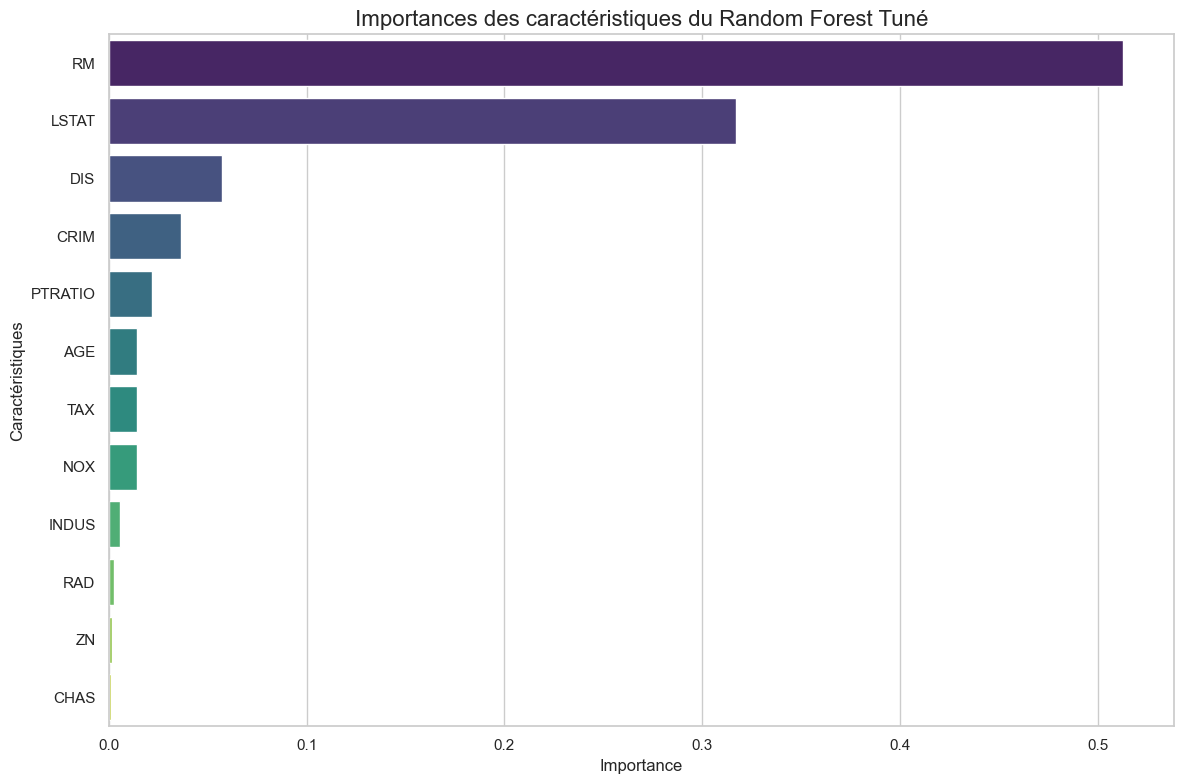

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Récupéreration des caractéristiques
importances = grid_search.best_estimator_.feature_importances_

importance_table = zip(X.columns, importances)
sorted_importance = sorted(importance_table, key=lambda x: x[1], reverse=True)

features, importances_sorted = zip(*sorted_importance)

features = list(features)
importances_sorted = list(importances_sorted)

# Graphique
plt.figure(figsize=(12, 8))
sns.barplot(x=importances_sorted, y=features, palette="viridis")

plt.title("Importances des caractéristiques du Random Forest Tuné", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Caractéristiques", fontsize=12)

plt.tight_layout()  
plt.show()




L’analyse des importances des caractéristiques issues du modèle Random Forest optimisé met en évidence que la variable la plus influente est RM, représentant le nombre moyen de pièces par logement, ce qui suggère que cette caractéristique joue un rôle déterminant dans la prédiction de la cible. Elle est suivie par LSTAT, indicateur du pourcentage de population à faible statut socio-économique, soulignant l’impact des inégalités sociales sur la variable étudiée. La variable DIS, qui mesure la proximité aux centres d’emploi, occupe également une place importante, traduisant l’effet de l’accessibilité sur la prédiction. Ensuite, CRIM, indicateur du taux de criminalité dans la zone, et PTRATIO, représentant le ratio élèves/professeurs, confirment l’importance des conditions environnementales et éducatives.

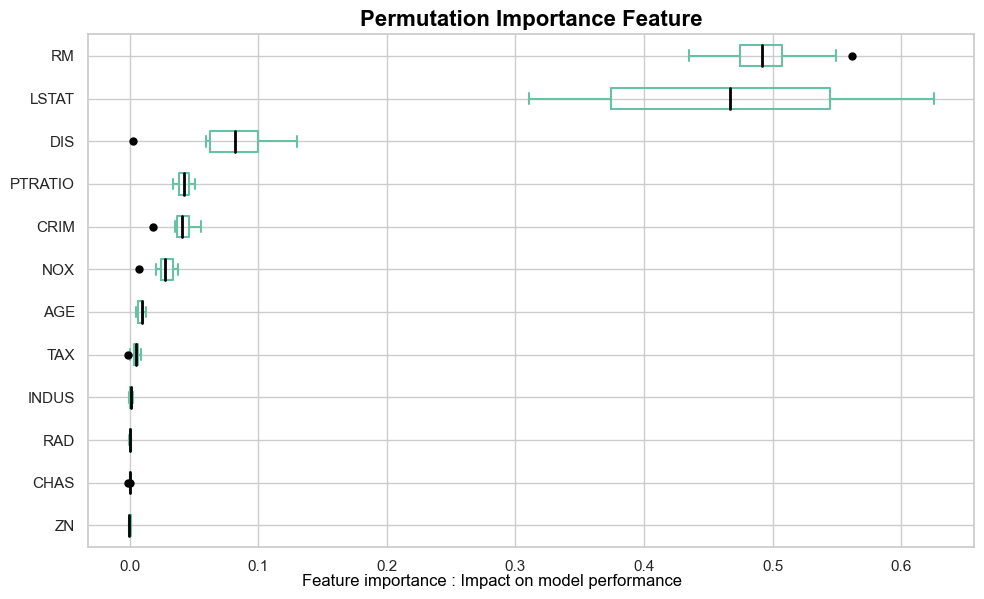

In [132]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Importance des caractéristiques par permutation et tri des features
resultat = permutation_importance(grid_search.best_estimator_, X_test, y_test, n_repeats=10, random_state=42)

sortie = resultat.importances_mean.argsort()

boxprops = dict(color="#66c2a5", linewidth=1.5)
whiskerprops = dict(color="#66c2a5", linewidth=1.5)
capprops = dict(color="#66c2a5", linewidth=1.5)

# Boxplot
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

ax1.boxplot(
    resultat.importances[sortie].T,
    vert=False,
    labels=X_train.columns[sortie],
    boxprops=boxprops,
    whiskerprops=whiskerprops,
    capprops=capprops,
    medianprops=dict(color="black", linewidth=2),  
    flierprops=dict(marker="o", markerfacecolor="black", markersize=5, linestyle="none"),  # Points aberrants en noir
)

plt.title("Permutation Importance Feature", fontsize=16, weight="bold", color="black")
fig.text(
    0.5, 
    0.01, 
    "Feature importance : Impact on model performance", 
    ha="center", 
    fontsize=12, 
    color="black"
)

fig.tight_layout()

plt.show()


En comparant les résultats obtenus avec le modèle de régression linéaire et le modèle Random Forest, on peut observer plusieurs différences  dans leurs performances.

Le RF après tuning présente une MSE de 0.1076 et un R² de 0.876, ce qui est nettement meilleur que les résultats du modèle linéaire, avec une MSE de 0.2781 et un R² de 0.6798. Cela signifie que le modèle Random Forest parvient à mieux capturer les relations complexes et les non-linéarités dans les données, expliquant ainsi une plus grande proportion de la variance de la variable cible. Les importances des caractéristiques montrent que des variables comme RM (nombre de pièces) et LSTAT (pourcentage de population de statut inférieur) sont très influentes, avec des importances respectives de 0.514 et 0.317, ce qui conforte les résultats du modèle linéaire, où RM et LSTAT étaient également des variables clés.

En revanche, la régression linéaire, bien que plus simple, explique environ 68% de la variance des données (avec un R² de 0.6798). Les coefficients montrent des relations claires mais linéaires : une augmentation du nombre de pièces (RM) augmente la valeur cible, tandis qu'une augmentation du pourcentage de la population de statut inférieur (LSTAT) diminue la valeur cible. Le modèle linéaire a l'avantage de fournir des coefficients explicites et facilement interprétables, mais il ne capture pas aussi bien les interactions complexes entre les variables que le Random Forest. Cependant, le modèle linéaire reste valide, avec des p-values très faibles indiquant que les variables sont statistiquement significatives et donc pertinentes pour la modélisation.

Ainsi, bien que le modèle de régression linéaire offre une bonne interprétabilité et une performance raisonnable, le Random Forest s'avère être plus puissant et précis pour prédire la variable cible, grâce à sa capacité à gérer des relations complexes et des interactions non linéaires entre les variables.

### 7) Réaliser une explicabilité par individu sur le modèle RF
- 1) ICE, le PDP est-il une bonne représentation des variables importantes de votre modèle?
- 2) LIME
- 3) SHAP watterfall plot

#### - ICE

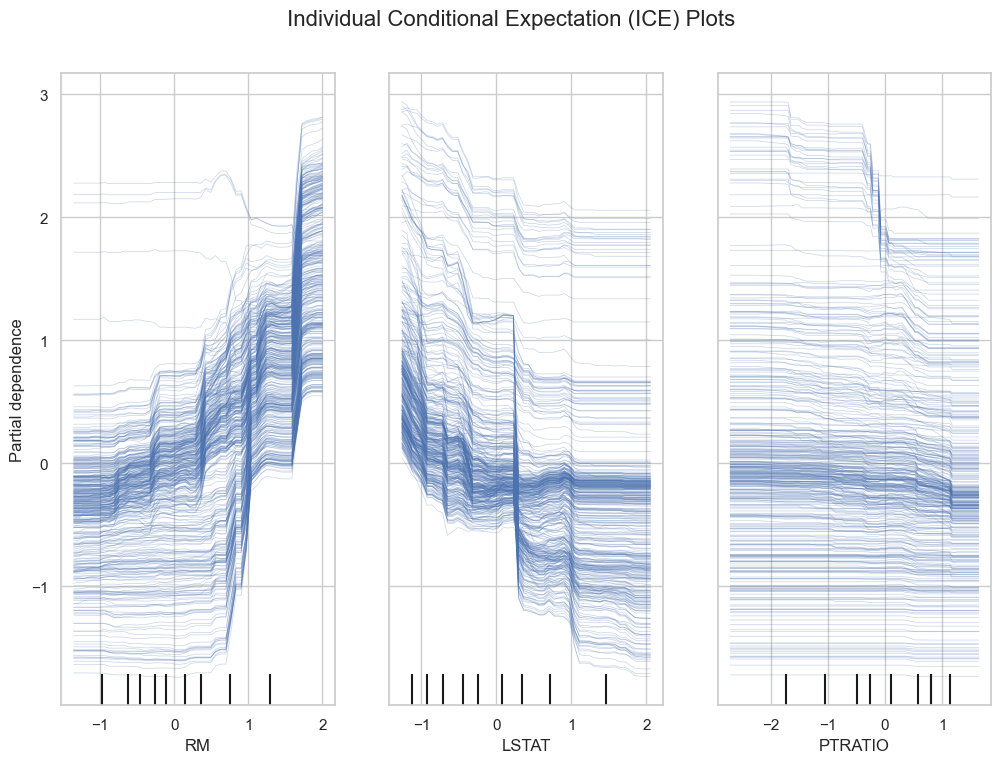

In [133]:
# ICE pour les variables les plus importantes
top_features = ['RM', 'LSTAT', 'PTRATIO']

fig, ax = plt.subplots(figsize=(12, 8))

display = PartialDependenceDisplay.from_estimator(
    grid_search.best_estimator_,
    X=X_train,
    features=top_features,
    kind="individual", 
    grid_resolution=50,
    ax=ax
)

plt.suptitle("Individual Conditional Expectation (ICE) Plots", fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()



Ce graphique représente des Individual Conditional Expectation (ICE) Plots, qui détaillent l'impact des trois variables les plus importantes sur la prédiction du modèle, en traçant l'évolution individuelle de chaque observation. Contrairement aux Partial Dependence Plots (PDP), qui montrent l'effet moyen, les ICE permettent d'observer les variations spécifiques à chaque observation. On observe que RM (nombre de pièces) a un effet positif et croissant sur la prédiction du modèle. La tendance générale est claire : plus le nombre de pièces est élevé, plus la valeur cible augmente. Cependant, les courbes individuelles révèlent des variations intéressantes, avec quelques observations qui montrent des effets plus faibles ou plus complexes en fonction des valeurs spécifiques de RM.

RM (nombre de pièces) a un effet fortement positif et croissant sur la prédiction du modèle : à mesure que le nombre de pièces augmente, la valeur prédite de la cible (comme la valeur d'un bien immobilier) augmente également. En revanche, les ICE Plots montrent que cet effet peut varier d'une observation à l'autre. Bien que la tendance générale soit à l'augmentation de la prédiction avec le nombre de pièces, certains points individuels peuvent présenter des fluctuations, indiquant que, pour certaines observations, le nombre de pièces n'a pas un impact aussi marqué sur la prédiction que pour d'autres.

Cette variation est cruciale pour comprendre que l'effet de RM n'est pas totalement uniforme et qu'il peut dépendre d'autres facteurs contextuels. En d'autres termes, bien que le modèle montre que RM est une variable importante, ses effets ne sont pas exactement les mêmes pour toutes les observations. Cela peut suggérer des interactions complexes avec d'autres variables, comme LSTAT ou PTRATIO, qui pourraient moduler cet effet de manière significative.


#### - LIME

In [134]:
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values, 
    feature_names=X_train.columns, 
    class_names=['Price'], 
    mode='regression'
)

i = 5  # individu 5
explanation = explainer.explain_instance(X_test.iloc[i].values, grid_search.best_estimator_.predict)

explanation.show_in_notebook()


/Users/ameldahmani/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


LIME permet de comprendre les prédictions du modèle en se concentrant sur des observations spécifiques. Dans notre cas, pour une observation particulière, qui est ici l'individu 5. La valeur prédite se situe autour de -0.12, dans un intervalle allant de -1.39 à 2.85. Les variables ayant un effet négatif sur la prédiction incluent le nombre moyen de pièces par logement (RM), pourcentage de population à faible statut socio-économique (LSTAT) et proximité aux centres d'emploi (DIS), indiquant que leur augmentation réduit la valeur estimée. À l’inverse, des variables comme le ratio élèves/professeurs (PTRATIO), le taux de criminalité (CRIM) et la concentration en oxydes d’azote (NOX) influencent positivement la prédiction, ce qui peut suggérer une corrélation complexe avec la cible du modèle.

#### - SHAP

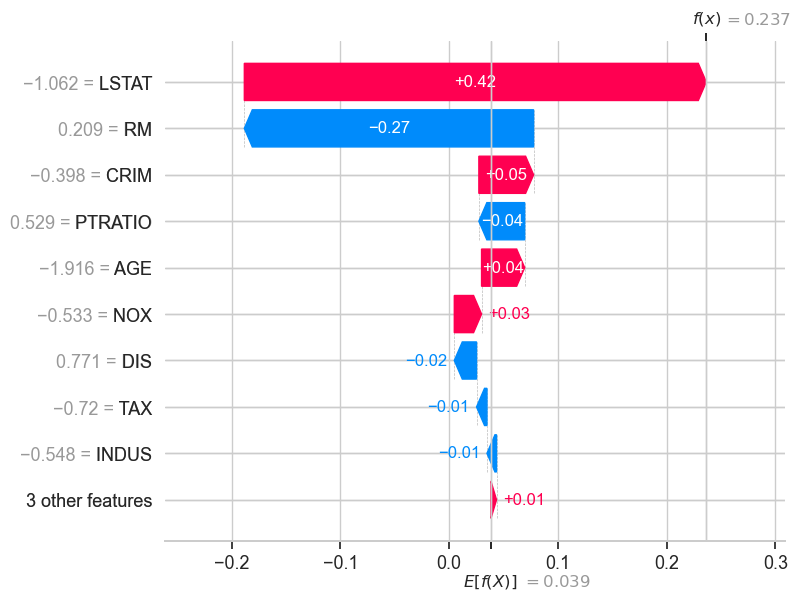

In [135]:
import shap

explainer = shap.TreeExplainer(grid_search.best_estimator_)

shap_values = explainer(X_train.iloc[0:100])

shap.initjs()

shap.waterfall_plot(shap_values[5]) #tjrs individu 5

Ce graphique en waterfall plot illustre l'impact des différentes caractéristiques sur la prédiction d'un modèle, probablement dans un contexte de machine learning pour une tâche de régression. Chaque caractéristique contribue positivement (en rouge) ou négativement (en bleu) à la valeur prédite, qui est de 0.217. 

LSTAT a l'effet le plus fort en augmentant la prédiction de +0.42, tandis que RM réduit la prédiction de -0.27. Les autres variables ont des effets plus faibles, positifs ou négatifs. La somme des contributions se base sur une valeur moyenne de 0.039.

Ainsi, nous relevons que les variables LSTAT et RM se distinguent particulièrement, tandis que les autres ont une importance plus modérée.

### 8) Explorer les graphiques SHAP étudiés  dans la partie CM
   1) beeswarm (Contribution des variables)
   2) scatter (équivalent pdp)

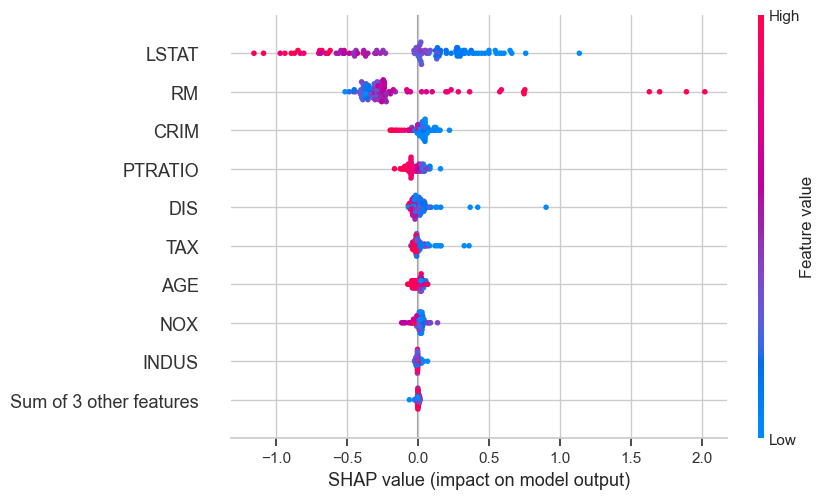

In [136]:
import shap
shap.plots.beeswarm(shap_values)

Ce graphique représente l'impact des variables sur les prédictions du modèle en utilisant les valeurs SHAP. Au sein de ce dernier, chaqye point correspond à une instance et montre comment une variable influence la prédiction : les valeurs positives augmentent la sortie du modèle, tandis que les valeurs négatives la diminuent. La couleur indique la valeur de la variable : bleu pour les valeurs faibles, rouge pour les valeurs élevées. 

Nous observons que LSTAT et RM sont les deux variables les plus influentes, ce qui est cohérent avec le précédent graphique en waterfall plot. Une valeur élevée de LSTAT tend à augmenter les prédictions, tandis qu'une valeur élevée de RM les réduit. D'autres variables comme CRIM, PTRATIO et DIS ont un effet plus modéré mais restent significatives.

In [137]:
shap.force_plot(shap_values[5]) #ind 5 tjrs

Le graphique en waterfall montre l'impact des différentes variables sur une prédiction d'un modèle de machine learning. La valeur de base est 0.03852, et la prédiction finalef(x) est de 0.22. 

Les variables en rouge (NOX, AGE, CRIM, LSTAT) réduisent la prédiction, avec LSTAT ayant l'effet le plus négatif (-1.062). À l'inverse, les variables en bleu (RM, PTRATIO, DIS) augmentent la prédiction, DIS ayant l'effet le plus positif (+0.7705). 

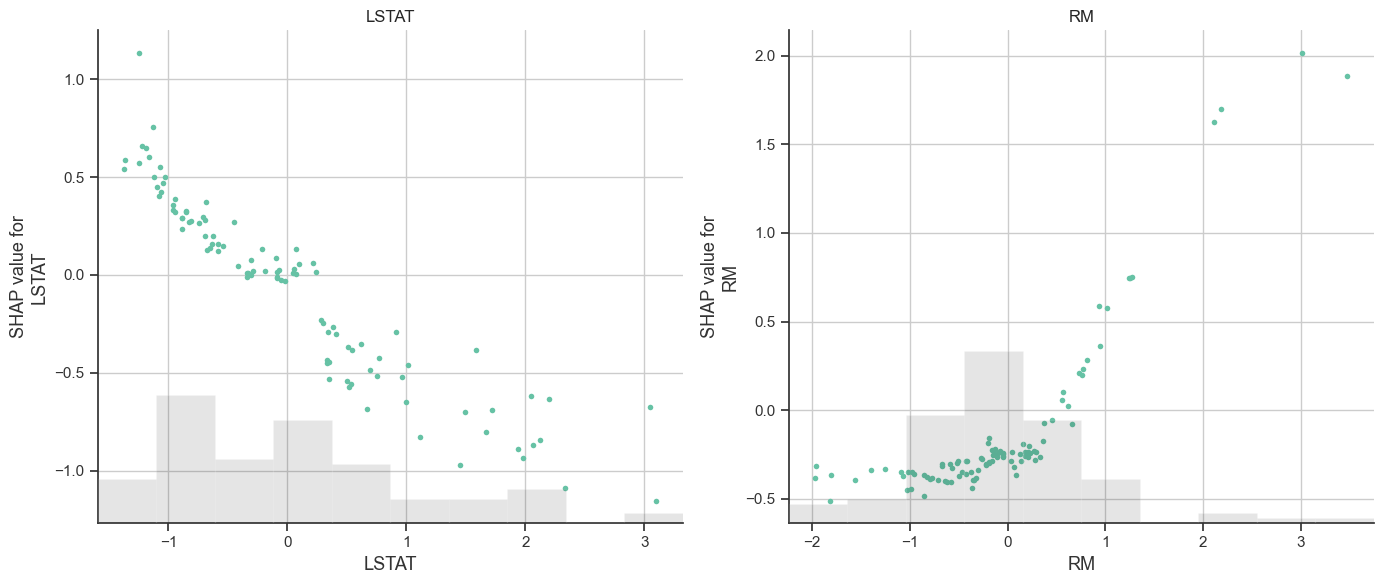

In [138]:
shap.plots.force(shap_values[5]) #ind 5

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Graphique SHAP pour 'LSTAT'
shap.plots.scatter(shap_values[:, 'LSTAT'], show=False, ax=axes[0])
axes[0].collections[0].set_facecolor('#66c2a5')  
axes[0].set_title('LSTAT')

#Graphique SHAP pour 'RM'
shap.plots.scatter(shap_values[:, 'RM'], show=False, ax=axes[1])
axes[1].collections[0].set_facecolor('#66c2a5')  
axes[1].set_title('RM')

plt.tight_layout()
plt.show()

Ces deux graphiques montrent l'impact des variables LSTAT et RM sur les prédictions du modèle à l'aide des valeurs SHAP. Nous observons une relation négative et décroissante pour LSTAT, indiquant qu’un pourcentage plus élevé de population à faible revenu diminue fortement la prédiction du modèle, probablement la valeur immobilière. À l’inverse, RM présente une relation positive et croissante, signifiant qu’un nombre moyen de pièces plus élevé entraîne une augmentation des prédictions. Ces tendances confirment les analyses précédentes, soulignant que LSTAT et RM sont les variables les plus influentes, avec des effets opposés sur la sortie du modèle.

### Conclusion

Dans le cadre de ce dossier, nous avons étudié l’explicabilité des modèles appliqués au Boston Housing Dataset, un ensemble de données connu pour la prédiction des prix de l’immobilier en fonction de diverses variables socio-économiques et environnementales. L’approche adoptée a consisté à comparer plusieurs modèles, notamment la régression linéaire et le Random Forest, afin d’évaluer leur capacité prédictive et d’analyser leur interprétabilité.

Après un nettoyage approfondi des données, différentes transformations ont été testées pour améliorer la robustesse des modèles. Un modèle de régression linéaire a d'abord été construit pour servir de baseline, avant d'optimiser un Random Forest par tuning des hyperparamètres.

La première étape a consisté à entraîner un modèle de régression linéaire qui sert de baseline en raison de sa simplicité et de sa capacité à fournir une interprétation directe des coefficients. Par la suite, un modèle de Random Forest a été estimé puis optimisé en ajustant ses hyperparamètres pour améliorer sa capacité prédictive. Afin de comprendre les relations entre les variables explicatives et la variable cible, plusieurs techniques d’interprétabilité globale ont été mises en œuvre, notamment la Permutation Feature Importance, les PDP (Partial Dependence Plots) et les ALE (Accumulated Local Effects). Ces analyses ont permis d’identifier les variables ayant le plus d’influence sur le modèle et de comparer les résultats obtenus avec ceux du modèle linéaire pour évaluer la cohérence des tendances observées.

L’analyse ne s’est pas limitée à l’interprétabilité globale, une explicabilité locale a également été réalisée afin d’examiner l’impact des variables sur des observations spécifiques. Des méthodes comme ICE (Individual Conditional Expectation) ont été utilisées pour visualiser les effets individuels des variables sur certaines prédictions. LIME (Local Interpretable Model-agnostic Explanations) a permis de construire des modèles locaux simplifiés pour mieux comprendre les décisions prises par le modèle, tandis que l’approche SHAP (SHapley Additive exPlanations) et son waterfall plot ont fourni une décomposition détaillée de la contribution de chaque variable à la prédiction finale.

Les résultats montrent que certaines variables se démarquent par leur forte influence sur la prédiction des prix immobiliers. En particulier, LSTAT, qui mesure le pourcentage de la population ayant un faible statut socio-économique, RM, représentant le nombre moyen de pièces par logement, et PTRATIO, qui correspond au ratio élèves/professeurs, jouent un rôle déterminant. L’analyse comparative des modèles a révélé que si la régression linéaire offre une interprétation plus directe, le Random Forest capture mieux les relations non linéaires, tout en restant interprétable grâce aux différentes méthodes utilisées.

Ainsi, cette étude met en évidence l’importance de l’explicabilité dans l’application des modèles de Machine Learning à des problématiques réelles. Grâce aux différentes techniques employées, nous avons pu identifier les variables déterminantes, comparer les performances des modèles et mieux comprendre les mécanismes sous-jacents aux prédictions. Ces approches offrent des perspectives intéressantes pour la prise de décision et l’utilisation de modèles prédictifs dans un contexte immobilier, garantissant à la fois performance et transparence.
